In [1]:
# Settings for notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Show Python version
import platform
platform.python_version()

'3.7.6'

In [2]:
try:
    import scrapy
except:
    !pip3 install scrapy
    import scrapy
from scrapy.crawler import CrawlerProcess

In [3]:
import json
import logging

class QuotesSpider(scrapy.Spider):
    name = "quotes"
    start_urls = [
        'http://www.ph.lacounty.gov/media/Coronavirus/locations.htm'
    ]
    custom_settings = {
        'LOG_LEVEL': logging.WARNING,
        'FEED_FORMAT':'json',                                 # Used for pipeline 2
        'FEED_URI': 'quoteresult.json'                        # Used for pipeline 2
    }
    
    def parse(self, response):
        cities = response.xpath('//table/tr/td[1]').extract()
        cases = response.xpath('//table/tr/td[2]').extract()
        rates = response.xpath('//table/tr/td[3]').extract()
        cities = list(map(lambda x: x.replace('<td>','').replace('</td>',''), cities))
        cases = list(map(lambda x: x.replace('<td>','').replace('</td>',''), cases))
        rates = list(map(lambda x: x.replace('<td>','').replace('</td>',''), rates))
        alist=[]
        lacitiesdata = { "lacitiescovid": alist }
        i = 0
        for city in cities:
            if i<28:
                i=i+1
                continue
            arec = { 'city': city, 'cases': cases[i] , 'rate':rates[i]}
            i=i+1
            alist.append(arec)
        with open('lacovidinfo.json', 'w') as jsonfile:
            print(json.dump(lacitiesdata, jsonfile, indent=4))
        alist

In [4]:
process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

process.crawl(QuotesSpider)
process.start()


2020-05-27 15:19:34 [scrapy.utils.log] INFO: Scrapy 2.1.0 started (bot: scrapybot)
2020-05-27 15:19:34 [scrapy.utils.log] INFO: Versions: lxml 4.5.1.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 20.3.0, Python 3.7.6 (default, Dec 30 2019, 19:38:26) - [Clang 11.0.0 (clang-1100.0.33.16)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1g  21 Apr 2020), cryptography 2.9.2, Platform Darwin-19.4.0-x86_64-i386-64bit
2020-05-27 15:19:34 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2020-05-27 15:19:34 [scrapy.crawler] INFO: Overridden settings:
{'LOG_LEVEL': 30,
 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2020-05-27 15:19:34 [py.warnings] WARNING: /Users/bbae/venv-python-3.7.6/lib/python3.7/site-packages/scrapy/extensions/feedexport.py:210: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEEDS` setting. Please see the `FEEDS` setting docs for more details
  expor

None


In [5]:
import pandas as pd

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

res = pd.read_json('lacovidinfo.json')
lcc = res.lacitiescovid
alist = []
llist = []
for x in lcc:
    if x['cases'] == '' or  x['cases'] == '--': 
        continue
    if x['rate'] == '--' or x['rate'] == '':
        continue
    if not is_number(x['cases']):
        continue
    if not is_number(x['rate']):
        continue
    anent = { 'city': x['city'], 'cases': float(x['cases']), 'rate': float(x['rate'])}
    alist.append(anent)
    if not x['city'].startswith('Los Angeles - '):
        continue
    llist.append(anent)
adf = pd.DataFrame(alist)
ldf = pd.DataFrame(llist)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(ldf)


                                      city  cases     rate
0            Los Angeles - Adams-Normandie   50.0   609.61
1                     Los Angeles - Alsace   47.0   377.66
2    Los Angeles - Angeles National Forest    0.0     0.00
3           Los Angeles - Angelino Heights   16.0   639.49
4                     Los Angeles - Arleta  263.0   765.20
5            Los Angeles - Atwater Village   51.0   347.74
6              Los Angeles - Baldwin Hills  159.0   510.84
7                    Los Angeles - Bel Air   35.0   415.23
8              Los Angeles - Beverly Crest   37.0   295.41
9                Los Angeles - Beverlywood   37.0   280.88
10            Los Angeles - Boyle Heights*  638.0   734.31
11                 Los Angeles - Brentwood   75.0   242.29
12                 Los Angeles - Brookside    0.0     0.00
13          Los Angeles - Cadillac-Corning   29.0   407.25
14               Los Angeles - Canoga Park  483.0   739.79
15                   Los Angeles - Carthay   76.0   529.

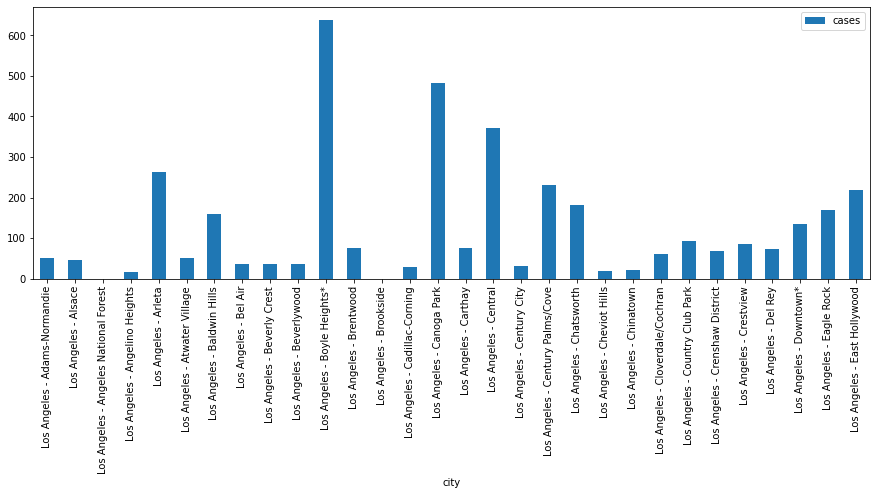

In [6]:
ldf[:30].plot(kind='bar', x='city', y='cases', figsize=(15,5))

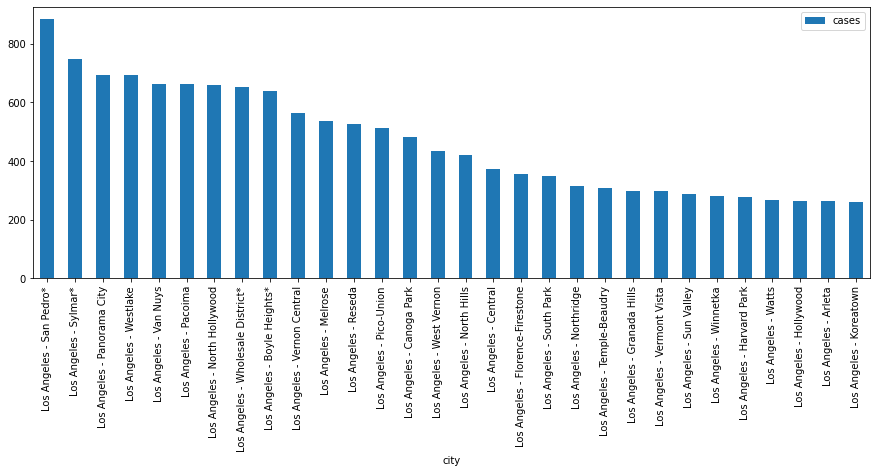

In [7]:
ldf.sort_values(by='cases', ascending=False)[:30].plot(kind='bar', x='city', y='cases', figsize=(15,5))

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(ldf.sort_values(by='rate', ascending=False))


                                      city  cases     rate
62            Los Angeles - Little Armenia  190.0  2367.60
134      Los Angeles - Wholesale District*  653.0  1807.41
85                Los Angeles - Pico-Union  514.0  1228.43
132                 Los Angeles - Westlake  693.0  1167.55
94                Los Angeles - San Pedro*  883.0  1131.50
120           Los Angeles - Vermont Square   83.0  1083.98
122           Los Angeles - Vernon Central  563.0  1082.73
100          Los Angeles - St Elmo Village   44.0   959.86
16                   Los Angeles - Central  372.0   954.04
51     Los Angeles - Historic Filipinotown  130.0   937.27
83             Los Angeles - Panorama City  693.0   920.93
99                Los Angeles - South Park  348.0   916.73
105                  Los Angeles - Sylmar*  749.0   909.00
80                   Los Angeles - Pacoima  664.0   862.57
116           Los Angeles - Valley Village  203.0   821.20
130              Los Angeles - West Vernon  435.0   810.

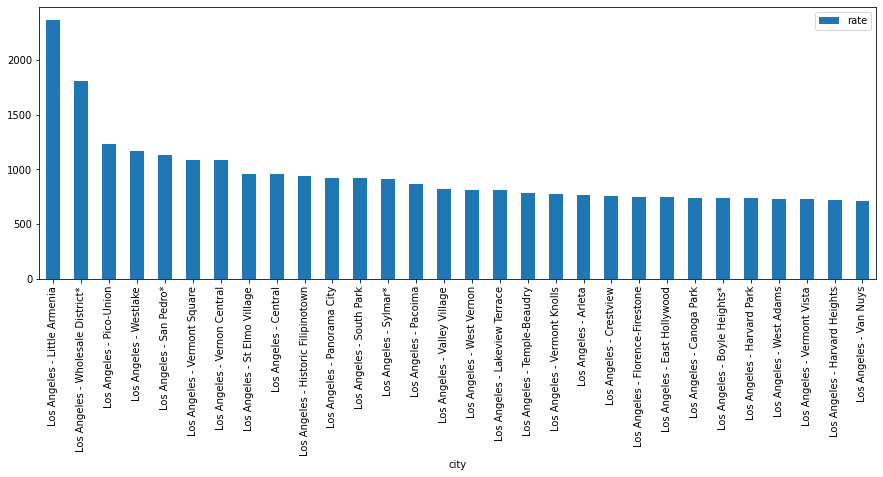

In [9]:
ldf.sort_values(by='rate', ascending=False)[:30].plot(kind='bar', x='city', y='rate', figsize=(15,5))

In [10]:
import os
import psycopg2

DATABASE_URL = os.environ['DATABASE_URL']

conn = psycopg2.connect(DATABASE_URL, sslmode='require')

In [11]:
cur = conn.cursor()
cur.execute("SELECT * FROM pg_catalog.pg_tables WHERE schemaname != 'pg_catalog' AND schemaname != 'information_schema';")
cur.fetchall()

[('public', 'test', 'blrxwnroakzmlk', None, True, False, False, False),
 ('public', 'lacovid2', 'blrxwnroakzmlk', None, True, False, False, False)]

In [12]:
#cur.execute("CREATE TABLE test (id serial PRIMARY KEY, num integer, data varchar);")

In [13]:
#cur.execute("INSERT INTO test (num, data) VALUES (%s, %s)",(100, "abc'def"))

In [14]:
cur.execute("SELECT * FROM test;")
cur.fetchone()

(1, 100, "abc'def")

In [15]:
cur.execute("DROP TABLE lacovid2;")
cur.execute("CREATE TABLE lacovid2 (id serial, city varchar PRIMARY KEY, cases float, rate float);")

In [16]:
for d in ldf.to_dict('records'):
   cur.execute("INSERT INTO lacovid2 (city, cases, rate) VALUES (%s, %s, %s)",(d['city'],d['cases'], d['rate']))

In [17]:
cur.execute("SELECT * FROM lacovid2 ORDER BY rate;")
cur.fetchall()

[(13, 'Los Angeles - Brookside', 0.0, 0.0),
 (3, 'Los Angeles - Angeles National Forest', 0.0, 0.0),
 (69, 'Los Angeles - Mandeville Canyon', 1.0, 32.01),
 (82, 'Los Angeles - Palisades Highlands', 3.0, 78.0),
 (87, 'Los Angeles - Playa Del Rey', 3.0, 93.87),
 (38, 'Los Angeles - Faircrest Heights', 4.0, 111.11),
 (134, 'Los Angeles - Westwood', 66.0, 121.98),
 (85, 'Los Angeles - Park La Brea', 19.0, 139.91),
 (91, 'Los Angeles - Regent Square', 4.0, 143.88),
 (105, 'Los Angeles - Sycamore Square', 1.0, 154.56),
 (112, 'Los Angeles - Toluca Woods', 3.0, 161.46),
 (132, 'Los Angeles - Westchester', 92.0, 178.28),
 (70, 'Los Angeles - Mar Vista', 80.0, 188.36),
 (119, 'Los Angeles - Venice', 65.0, 191.83),
 (130, 'Los Angeles - West Los Angeles', 74.0, 196.62),
 (88, 'Los Angeles - Playa Vista', 23.0, 210.1),
 (125, 'Los Angeles - View Heights', 8.0, 216.57),
 (21, 'Los Angeles - Cheviot Hills', 20.0, 218.08),
 (110, 'Los Angeles - Toluca Lake', 19.0, 218.29),
 (74, 'Los Angeles - Mirac

In [18]:
cur.execute("SELECT * FROM lacovid2 ORDER BY cases;")
cur.fetchall()

[(13, 'Los Angeles - Brookside', 0.0, 0.0),
 (3, 'Los Angeles - Angeles National Forest', 0.0, 0.0),
 (69, 'Los Angeles - Mandeville Canyon', 1.0, 32.01),
 (105, 'Los Angeles - Sycamore Square', 1.0, 154.56),
 (87, 'Los Angeles - Playa Del Rey', 3.0, 93.87),
 (82, 'Los Angeles - Palisades Highlands', 3.0, 78.0),
 (112, 'Los Angeles - Toluca Woods', 3.0, 161.46),
 (91, 'Los Angeles - Regent Square', 4.0, 143.88),
 (38, 'Los Angeles - Faircrest Heights', 4.0, 111.11),
 (111, 'Los Angeles - Toluca Terrace', 6.0, 459.42),
 (125, 'Los Angeles - View Heights', 8.0, 216.57),
 (48, 'Los Angeles - Harbor Pines', 9.0, 373.6),
 (36, 'Los Angeles - Exposition', 9.0, 270.6),
 (94, 'Los Angeles - Reynier Village', 10.0, 236.52),
 (96, 'Los Angeles - Shadow Hills', 10.0, 225.12),
 (114, 'Los Angeles - University Hills', 11.0, 320.79),
 (71, 'Los Angeles - Marina Peninsula', 12.0, 275.23),
 (33, 'Los Angeles - Elysian Park', 16.0, 280.11),
 (4, 'Los Angeles - Angelino Heights', 16.0, 639.49),
 (90, 'L

In [19]:
cur.execute("SELECT * FROM lacovid2 WHERE city = 'Los Angeles - Eagle Rock';")
cur.fetchall()

[(29, 'Los Angeles - Eagle Rock', 170.0, 429.41)]

In [20]:
conn.commit()
cur.close()
conn.close()